This is the notebook I used to create and train the model depolyed on the webpage mention in the README.md file. To see how I created my data set and experimented, look at the 'Fruit Classifier.ipynb' file. I explain certain functions and decisions in more detail there.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [14]:
bs = 64

In [6]:
path = Path('data/Fruit')

In [7]:
path.ls()

[PosixPath('data/Fruit/urls_raspberry.csv'),
 PosixPath('data/Fruit/Lime'),
 PosixPath('data/Fruit/Pear'),
 PosixPath('data/Fruit/urls_apple.csv'),
 PosixPath('data/Fruit/urls_mango.csv'),
 PosixPath('data/Fruit/Lemon'),
 PosixPath('data/Fruit/urls_blackberry.csv'),
 PosixPath('data/Fruit/models'),
 PosixPath('data/Fruit/urls_strawberry.csv'),
 PosixPath('data/Fruit/.ipynb_checkpoints'),
 PosixPath('data/Fruit/urls_banana.csv'),
 PosixPath('data/Fruit/urls_orange.csv'),
 PosixPath('data/Fruit/Apple'),
 PosixPath('data/Fruit/urls_pear.csv'),
 PosixPath('data/Fruit/Strawberry'),
 PosixPath('data/Fruit/Blueberry'),
 PosixPath('data/Fruit/urls_blueberry.csv'),
 PosixPath('data/Fruit/cleaned.csv'),
 PosixPath('data/Fruit/urls_tomato.csv'),
 PosixPath('data/Fruit/urls_lemon.csv'),
 PosixPath('data/Fruit/Banana'),
 PosixPath('data/Fruit/Orange'),
 PosixPath('data/Fruit/urls_lime.csv'),
 PosixPath('data/Fruit/Blackberry'),
 PosixPath('data/Fruit/Raspberry'),
 PosixPath('data/Fruit/Tomato'),
 P

Now it's time to create a data bunch. In this case, I used an 80/20 split for training/validation sets to stay consistent with my experimentation notebook (Fruit Classifier.ipynb).

In [15]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
                                ds_tfms=get_transforms(), size=224, bs=64, num_workers=4).normalize(imagenet_stats)

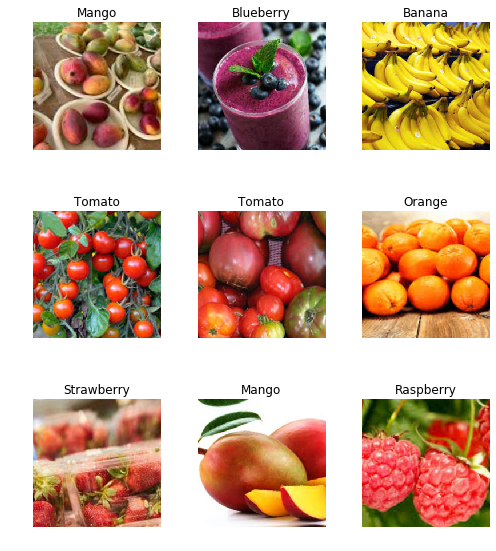

In [16]:
data.show_batch(rows=3, figsize=(7,8))

learn1 is my learning object which I train throughout this notebook. I used ResNet50 as the model in attempt to get better results (relative ro ResNet34).

In [17]:
learn1 = cnn_learner(data, models.resnet50, metrics=error_rate)

In [18]:
learn1.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.474690,0.713634,0.187500,00:17
1,0.870697,0.538446,0.147569,00:15
2,0.580484,0.502257,0.138889,00:15
3,0.414268,0.495270,0.131944,00:15


In [19]:
learn1.unfreeze()

In [20]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


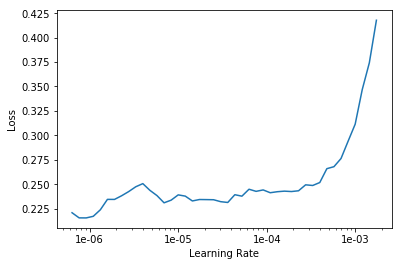

In [21]:
learn1.recorder.plot()

I saved the model after each training session in case it started to overfit. If it did, I could just load a previous model.

In [22]:
learn1.save('stage-1')

In [23]:
learn1.fit_one_cycle(2, max_lr=slice(3e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.311069,0.529540,0.151042,00:20
1,0.263559,0.382121,0.116319,00:20


In [24]:
interp = ClassificationInterpretation.from_learner(learn1)

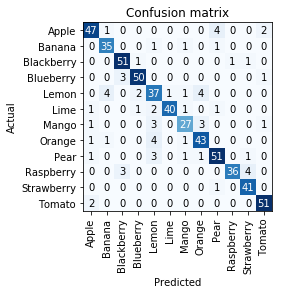

In [26]:
interp.plot_confusion_matrix()

In [27]:
learn1.save('stage-2')

In [28]:
learn1.fit_one_cycle(2, max_lr=slice(3e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.197334,0.443806,0.130208,00:20
1,0.168271,0.427671,0.109375,00:20


In [29]:
learn1.save('stage-3')

In [30]:
learn1.fit_one_cycle(2, max_lr=slice(3e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.132381,0.450443,0.114583,00:20
1,0.140043,0.379347,0.100694,00:20


In [32]:
learn1.save('stage-4')

After seeing the continual decrease in the error_rate in these training cycles with fewer epochs, I decided to load 'stage-1' and run it for the same amount of epochs, but all at once.

In [ ]:
learn1.load('stage-1')

In [34]:
learn1.fit_one_cycle(6, max_lr=slice(3e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.259334,0.431232,0.123264,00:20
1,0.300738,0.535037,0.130208,00:20
2,0.242462,0.443101,0.105903,00:20
3,0.184127,0.449383,0.104167,00:20
4,0.119905,0.375912,0.097222,00:20
5,0.089244,0.367397,0.102431,00:20


I decided to go with the model I saved as 'stage-4', as it had the lowest final error rate (by a small amount), with the error rate being on a downwards trend in the final epoch.

In [ ]:
learn1.load('stage-4')

In [36]:
learn1.save('Fruit_rs50_good')

In [ ]:
learn1.load('Fruit_rs50_good')

In [38]:
learn1.export()